In [19]:
import pandas as pd
df = pd.read_csv('../datasets/merged_trimmed_data.csv')
df.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,metacritic_score,achievements,genres,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",81,10773,9.99,1,96,33,['Action'],142368,3687,10000000 - 20000000,606,185,311,315
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,96,77,"['Action', 'Adventure']",1171197,210154,20000000 - 50000000,13650,656,6274,154
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",24,4321,9.99,1,96,0,['Action'],73346,2619,5000000 - 10000000,459,102,127,102
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",52,7482,9.99,1,95,51,"['Action', 'Adventure']",298300,3638,10000000 - 20000000,874,118,514,138
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,First-Person,Western...",32,11301,19.99,1,94,75,['RPG'],293938,16035,5000000 - 10000000,6458,596,3032,878


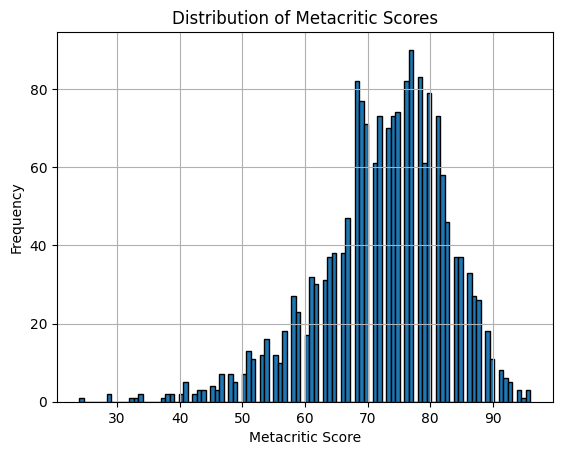

In [20]:
import matplotlib.pyplot as plt
df['score'].hist(bins=100, edgecolor='black')
plt.xlabel('Metacritic Score')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Distribution of Metacritic Scores')
plt.savefig('metacritic_histogram.png', dpi=300, bbox_inches='tight')# Title

In [21]:
df['score_diff'] = df['score'] - df['metacritic_score']
print(df['score_diff'])

0       0
1       0
2       0
3       0
4       0
       ..
1835    0
1836    0
1837    0
1838    0
1839    0
Name: score_diff, Length: 1840, dtype: int64


<Axes: >

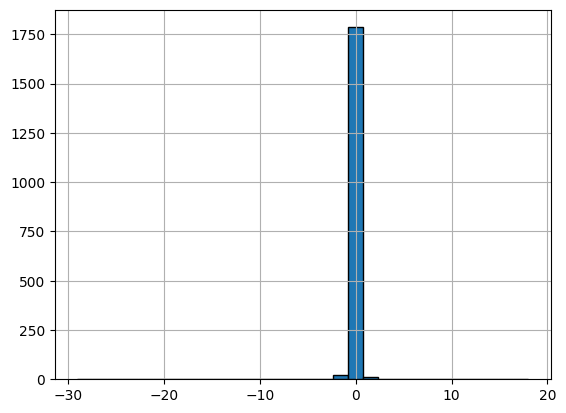

In [22]:
df['score_diff'].hist(bins=30, edgecolor='black')

In [23]:
mu, sigma = df['score_diff'].mean(), df['score_diff'].std()
print(mu, sigma)
df.head()

-0.058152173913043476 1.0989088753681364


,name,r-date,score,user score,genre,critics,users,price,dlc_count,metacritic_score,achievements,genres,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,score_diff
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",81,10773,9.99,1,96,33,['Action'],142368,3687,10000000 - 20000000,606,185,311,315,0
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,96,77,"['Action', 'Adventure']",1171197,210154,20000000 - 50000000,13650,656,6274,154,0
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",24,4321,9.99,1,96,0,['Action'],73346,2619,5000000 - 10000000,459,102,127,102,0
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",52,7482,9.99,1,95,51,"['Action', 'Adventure']",298300,3638,10000000 - 20000000,874,118,514,138,0
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,First-Person,Western...",32,11301,19.99,1,94,75,['RPG'],293938,16035,5000000 - 10000000,6458,596,3032,878,0


In [24]:
anomalies = df[(df['score_diff'] > mu + 2*sigma) | (df['score_diff'] < mu - 2*sigma)]
number_anomalies = anomalies.shape[0]
number_perfect = df[df['score_diff'] == 0].shape[0]
print(number_anomalies, number_perfect)
print(anomalies[['name','score','metacritic_score','score_diff']])

17 1786
                               name  score  metacritic_score  score_diff
278                    Metro Exodus     82                85          -3
465               The Wolf Among Us     80                85          -5
705                     Worms W.M.D     76                79          -3
709               The Last Campfire     76                80          -4
714                 Mortal Kombat X     76                84          -8
758                 Resident Evil 4     76                79          -3
768                      Broken Age     76                73           3
832                     Dying Light     75                87         -12
874             GRIP: Combat Racing     74                80          -6
876            Guns, Gore & Cannoli     74                80          -6
888                Street Fighter V     74                89         -15
1056          The Political Machine     72                54          18
1106                     The Detail     71 

In [25]:
ar_df = df.drop(anomalies.index)
ar_df.shape[0]

1823

In [26]:
ar_df.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,metacritic_score,achievements,genres,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,score_diff
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",81,10773,9.99,1,96,33,['Action'],142368,3687,10000000 - 20000000,606,185,311,315,0
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,96,77,"['Action', 'Adventure']",1171197,210154,20000000 - 50000000,13650,656,6274,154,0
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",24,4321,9.99,1,96,0,['Action'],73346,2619,5000000 - 10000000,459,102,127,102,0
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",52,7482,9.99,1,95,51,"['Action', 'Adventure']",298300,3638,10000000 - 20000000,874,118,514,138,0
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,First-Person,Western...",32,11301,19.99,1,94,75,['RPG'],293938,16035,5000000 - 10000000,6458,596,3032,878,0


In [27]:
ar_df['total_steam_reviews']=ar_df['positive']+ar_df['negative']
ar_df['percent_positive_steam']=ar_df['positive']/ar_df['total_steam_reviews']
ar_df.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,metacritic_score,...,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,score_diff,total_steam_reviews,percent_positive_steam
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",81,10773,9.99,1,96,...,142368,3687,10000000 - 20000000,606,185,311,315,0,146055,0.974756
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,96,...,1171197,210154,20000000 - 50000000,13650,656,6274,154,0,1381351,0.847863
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",24,4321,9.99,1,96,...,73346,2619,5000000 - 10000000,459,102,127,102,0,75965,0.965524
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",52,7482,9.99,1,95,...,298300,3638,10000000 - 20000000,874,118,514,138,0,301938,0.987951
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,First-Person,Western...",32,11301,19.99,1,94,...,293938,16035,5000000 - 10000000,6458,596,3032,878,0,309973,0.948270


In [28]:
df_dropped = ar_df.drop(['positive','negative','metacritic_score','score_diff'], axis=1)
df_dropped.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,achievements,genres,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,total_steam_reviews,percent_positive_steam
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",81,10773,9.99,1,33,['Action'],10000000 - 20000000,606,185,311,315,146055,0.974756
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,77,"['Action', 'Adventure']",20000000 - 50000000,13650,656,6274,154,1381351,0.847863
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",24,4321,9.99,1,0,['Action'],5000000 - 10000000,459,102,127,102,75965,0.965524
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",52,7482,9.99,1,51,"['Action', 'Adventure']",10000000 - 20000000,874,118,514,138,301938,0.987951
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,First-Person,Western...",32,11301,19.99,1,75,['RPG'],5000000 - 10000000,6458,596,3032,878,309973,0.948270


<Axes: >

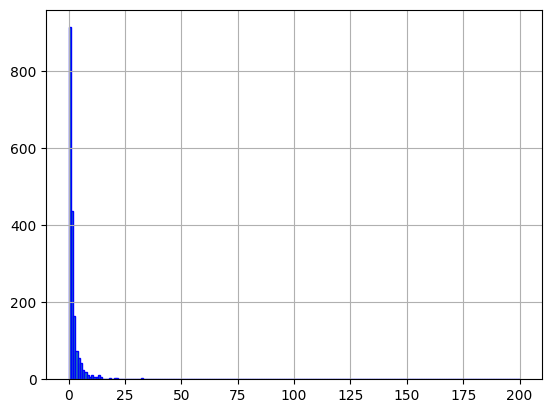

In [29]:
df_dropped['dlc_count'].hist(bins=200, edgecolor='blue')

In [30]:
# # Checking what minimum dlc means (if 1 includes the base game)
# min_value = df_dropped['dlc_count'].min()
# # Count how many times the minimum value appears
# min_count = df_dropped['dlc_count'].value_counts().get(min_value, 0)
# print(min_value, min_count)

In [31]:
owner_bins = df_dropped['estimated_owners'].value_counts()
print(owner_bins)

estimated_owners
200000 - 500000          348
100000 - 200000          290
50000 - 100000           259
20000 - 50000            230
500000 - 1000000         220
1000000 - 2000000        153
0 - 20000                144
2000000 - 5000000        119
5000000 - 10000000        28
10000000 - 20000000       15
20000000 - 50000000        8
0 - 0                      6
50000000 - 100000000       2
100000000 - 200000000      1
Name: count, dtype: int64


In [32]:
df_drop2 = df_dropped[df_dropped['estimated_owners'] != '0 - 0']
df_drop2.shape[0]

1817

In [33]:
estimated_owners_map = {"0 - 20000": 1, "20000 - 50000": 3.5, "50000 - 100000": 7.5,
                       "100000 - 200000": 15, '200000 - 500000': 35, '500000 - 1000000': 75,
                        '1000000 - 2000000': 150, '2000000 - 5000000': 350, '5000000 - 10000000': 750,
                       '10000000 - 20000000': 1500, '20000000 - 50000000': 3500}
df_drop2['Estimated_Owners_Numeric'] = df_drop2['estimated_owners'].map(estimated_owners_map)

C:\Users\yasis\AppData\Local\Temp\ipykernel_3788\4177906346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop2['Estimated_Owners_Numeric'] = df_drop2['estimated_owners'].map(estimated_owners_map)


In [34]:
df_drop2.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,achievements,genres,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,total_steam_reviews,percent_positive_steam,Estimated_Owners_Numeric
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",81,10773,9.99,1,33,['Action'],10000000 - 20000000,606,185,311,315,146055,0.974756,1500.0
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,77,"['Action', 'Adventure']",20000000 - 50000000,13650,656,6274,154,1381351,0.847863,3500.0
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",24,4321,9.99,1,0,['Action'],5000000 - 10000000,459,102,127,102,75965,0.965524,750.0
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",52,7482,9.99,1,51,"['Action', 'Adventure']",10000000 - 20000000,874,118,514,138,301938,0.987951,1500.0
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,First-Person,Western...",32,11301,19.99,1,75,['RPG'],5000000 - 10000000,6458,596,3032,878,309973,0.948270,750.0


In [35]:
df_drop2 = df_drop2.dropna()
df_drop2.columns

Index(['name', 'r-date', 'score', 'user score', 'genre', 'critics', 'users',
       'price', 'dlc_count', 'achievements', 'genres', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks',
       'total_steam_reviews', 'percent_positive_steam',
       'Estimated_Owners_Numeric'],
      dtype='object')

In [36]:
df_drop2.to_csv('../datasets/anomaly_removed_column_organised.csv', index=False)